In [78]:
#clear everything for a fresh run

%reset -f
%whos

Interactive namespace is empty.


In [75]:
#load all relevant modules and packages, etc.

#%reset -f
#%whos

#Misc
import time, os, sys, pdb
from glob import glob
from fnmatch import fnmatch

#Base
import numpy as np
import pandas as pd
import scipy.io as sio
import scipy.stats as st
from scipy.ndimage import gaussian_filter1d
from scipy.stats import zscore

#Save
import json
import scipy.io as sio
import h5py

#Plot
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import cv2
from PIL import Image
from matplotlib import cm
from matplotlib.backends.backend_pdf import PdfPages
sns.set_style("ticks")

#Model
import ssm

#CCM
#from DelayEmbedding import DelayEmbedding as DE

#User
#import util
#import plotting as usrplt

import warnings
warnings.filterwarnings("ignore")

Interactive namespace is empty.


In [76]:
#load npy file: "standard frames"

import numpy as np

#Unpack dictionary into individual variables with same individual names as in previous session
from operator import itemgetter

def getList(dict):
    list = []
    for key in dict.keys():
        list.append(key)
          
    return list

npy_dict_name=input("Enter full path and filename of standard frames file to load")
npy_dict=np.load(npy_dict_name,allow_pickle='True')
npy_dict=npy_dict.item()

npy_dict_list=getList(npy_dict)
print(npy_dict_list)
print(len(npy_dict_list))

for i in range(0,len(npy_dict_list)):
    globals()[npy_dict_list[i]]=itemgetter(npy_dict_list[i])(npy_dict)

#%whos

Enter full path and filename of standard frames file to load G:\uobrainflex_analysis_2022\4022_210609_E267_0_00017_00001\standard_frames_4022_210609_E267_0_00017_00001_20230123-150030.npy


['behav_resamp_frame', 'behav_corr_frame', 'dfof_upsamp_frame', 'bsoid_frame', 'roi_info_frame', 'areas', 'iscell', 'ops', 'behav_t', 'ppl_t', 'movie_t', 'meso_t', 'dfof_upsamp_frame.index', 'session_masks', 'iscell_masks', 'area_num', 'outlines_flat', 'nROIs', 'stat', 'fsuffix', 'PlotDir', 'y_pred', 'isort_dfof', 'isort', 'plotslice', 'isort_dfof_kmeans', 'nClusters', 'min_range', 'max_range', 'areas_rastermap_density', 'raster_cell_count', 'raster_cell_densities', 'session_masks_rastermap_density', 'im_restrict_masked_rastermap_density', 'raster_mean_traces', 'kernel_size', 'kernel', 'joint_restricted_frame', 'joint_raw_restricted_frame', 'joint_motifs_raw_frame', 'joint_motifs_frame', 'raster_mean_traces_frame', 'raster_mean_traces_upsamp_frame', 'rastermap_upsamp_frame', 'res_int', 'iscell_masks_cell', 'nClust_cell_count', 'plot_time', 'raster_mean_traces_convolved', 'nNeurons', 'cell_count']
51


In [77]:
#create BSOiD array from dataFrame

bsoid_array=bsoid_frame.to_numpy()
print(bsoid_array.shape)
print(max(bsoid_array))

(65729, 1)
[4.]


In [43]:
#Display dataFrame, extracted simple behavioral measures

behav_resamp_frame

,lft_ppl_ser,rt_ppl_ser,lft_whisk_ser,rt_whisk_ser,walk_ser,fr_cl_2p_ser
0.000000,0.354560,0.222610,0.087110,0.063622,2.999565,-0.004730
0.000109,0.354535,0.267924,0.081359,0.221522,2.999462,-0.003510
0.000218,0.354709,0.313183,0.084779,0.190104,2.999521,-0.004272
0.000327,0.354281,0.358387,0.053137,0.024170,2.999542,-0.004425
0.000436,0.353554,0.403553,0.033471,0.022348,2.999561,-0.004425
...,...,...,...,...,...,...
1.998343,0.295056,0.330506,0.009045,0.010524,2.999315,-0.004578
1.998452,0.295047,0.330522,0.009049,0.010523,2.999325,-0.005188
1.998561,0.295038,0.330539,0.009044,0.010522,2.999320,-0.004883
1.998670,0.295030,0.330551,0.009051,0.010520,2.999339,-0.004425


In [44]:
#Display dataFrame, 2P meso dF/F

dfof_upsamp_frame

,0,1,2,3,4,5,6,7,8,9,...,3422,3423,3424,3425,3426,3427,3428,3429,3430,3431
0.000000,0.009010,0.365234,-0.114258,0.123901,0.409180,-0.312988,0.474854,3.128906,1.707031,2.166016,...,0.001390,-0.890137,-0.078491,3.339844,0.415771,0.385010,0.151855,5.976562,15.492188,0.126221
0.000109,0.233154,0.403076,0.444824,0.275879,0.501953,-0.240234,0.682129,3.226562,1.966797,2.859375,...,0.163452,-0.618652,-0.798828,4.078125,0.035614,0.225586,0.111450,3.845703,13.367188,0.317383
0.000218,0.668457,0.648438,0.942383,0.456299,0.416748,-0.086182,0.598633,3.335938,1.848633,3.529297,...,0.482910,-0.505859,-2.035156,4.496094,-0.058228,0.343506,0.299072,1.393555,9.140625,0.515137
0.000327,1.188477,1.103516,1.177734,0.583496,0.156128,0.017761,0.277588,3.750000,1.527344,3.748047,...,0.831543,-0.656250,-3.527344,4.640625,0.055542,0.573730,0.677246,-0.340576,4.644531,0.634766
0.000436,1.578125,1.648438,1.130859,0.629883,-0.141846,-0.041992,-0.056671,4.503906,1.235352,3.273438,...,1.102539,-0.954590,-4.984375,4.593750,0.224243,0.722656,1.130859,-0.853027,1.682617,0.638672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.998343,1.791016,1.797852,1.017578,0.867188,1.406250,0.476562,-0.083862,-0.549316,-0.596191,-0.350342,...,1.369141,-1.474609,-3.785156,0.021606,1.472656,0.978027,1.627930,1.994141,2.417969,0.537109
1.998452,1.208008,1.344727,0.501465,0.770020,1.041992,0.409424,-0.264160,-0.119263,-0.684082,0.469482,...,1.262695,-1.157227,-3.070312,0.119629,1.847656,1.464844,1.485352,2.773438,4.015625,0.409668
1.998561,0.659180,0.950195,-0.069519,0.512207,0.600098,0.224243,-0.340088,0.798340,-0.381348,1.122070,...,0.885254,-1.111328,-1.891602,0.556152,1.901367,1.598633,1.154297,4.429688,7.296875,0.226440
1.998670,0.248169,0.661621,-0.453125,0.243042,0.316162,-0.024078,-0.213745,1.873047,0.280273,1.472656,...,0.425537,-1.165039,-0.736328,1.352539,1.578125,1.320312,0.753418,6.128906,11.390625,0.073181


In [45]:
#Display dataFrame, correlations of 2P meso dF/F with extracted simple behavioral measures

behav_corr_frame

,lft_whisk_corr,rt_whisk_corr,lft_ppl_corr,rt_ppl_corr,walk_corr
0,-0.024899,-0.038156,0.020605,-0.056240,-0.007809
1,0.071955,0.078488,-0.203119,0.181811,0.062907
2,-0.030322,-0.007774,-0.095091,0.181194,0.015648
3,0.013761,-0.002280,0.000217,0.061914,0.016324
4,0.005172,0.014069,-0.099263,0.134941,0.046623
...,...,...,...,...,...
3427,0.020742,0.026057,0.031856,-0.043192,-0.009383
3428,0.013072,0.022041,0.020491,-0.052669,-0.029521
3429,0.010652,-0.003211,-0.042553,0.058453,0.029105
3430,0.003332,-0.007171,0.022305,0.010004,-0.047376


In [46]:
#Display dataFrame, BSOID extracted behavioral motifs
test=list(bsoid_frame.index.values)
print(test[2000])
print(bsoid_frame)

0.00043596240826942215
                 0
0.000000e+00   0.0
2.179812e-07   0.0
4.359624e-07   0.0
6.539436e-07   0.0
8.719248e-07   0.0
...            ...
1.198482e-02  10.0
1.198504e-02  10.0
1.198526e-02  10.0
1.198548e-02  10.0
1.198570e-02  10.0

[54986 rows x 1 columns]


In [48]:
#Display dataFrame, roi info frame

roi_info_frame

,isort_dfof,isort_rastergroup,iscell_masks_cell,iscell_loc,med_x,med_y,npix,radius,aspect_ratio,compact,footprint,skew,std
0,1289,4,17,0,720.0,367.0,20.0,2.078125,1.071289,1.027344,0.976074,2.619141,298.25000
1,2453,6,12,1,240.0,551.0,20.0,2.078125,1.069336,1.017578,1.153320,4.003906,180.87500
2,1702,5,14,2,426.0,237.0,20.0,2.023438,1.052734,1.052734,1.135742,2.464844,357.75000
3,2250,6,14,3,574.0,313.0,22.0,2.166016,1.141602,1.024414,1.083008,2.914062,304.25000
4,822,3,45,4,350.0,893.0,23.0,2.441406,1.179688,1.033203,1.250977,1.143555,235.12500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3427,3233,9,45,3749,381.5,883.5,16.0,2.085938,1.047852,0.983398,1.056641,1.196289,46.59375
3428,848,3,18,3750,678.0,147.0,15.0,2.738281,1.316406,1.084961,0.836914,0.799805,61.81250
3429,3394,9,17,3751,681.5,327.0,20.0,2.505859,1.104492,1.040039,1.123047,0.263916,39.03125
3430,274,0,12,3752,353.0,547.0,17.0,2.408203,1.152344,1.043945,1.852539,0.504395,58.40625


In [49]:
#Display session header info

#ops
ops_keys = list(ops)
for i in range(len(getList(ops))):
    print(ops_keys[i])
    
#print(ops['tau'])
#print(len(ops_keys))
#print(len(ops))

look_one_level_down
fast_disk
delete_bin
mesoscan
h5py
h5py_key
save_path0
subfolders
nplanes
nchannels
functional_chan
tau
fs
force_sktiff
preclassify
save_mat
combined
aspect
do_bidiphase
bidiphase
do_registration
keep_movie_raw
nimg_init
batch_size
maxregshift
align_by_chan
reg_tif
reg_tif_chan2
subpixel
smooth_sigma
th_badframes
pad_fft
nonrigid
block_size
snr_thresh
maxregshiftNR
1Preg
spatial_hp
pre_smooth
spatial_taper
roidetect
sparse_mode
diameter
spatial_scale
connected
nbinned
max_iterations
threshold_scaling
max_overlap
high_pass
inner_neuropil_radius
min_neuropil_pixels
allow_overlap
chan2_thres
baseline
win_baseline
sig_baseline
prctile_baseline
neucoeff
xrange
yrange
data_path
save_path
ops_path
reg_file
first_tiffs
frames_per_folder
filelist
nframes
meanImg
Ly
Lx
yblock
xblock
nblocks
NRsm
refImg
yoff
xoff
corrXY
yoff1
xoff1
corrXY1
badframes
regPC
regDX
tPC
spatscale_pix
max_proj
Lyc
Lxc
Vcorr
sdmov
meanImgE


['l_VISp' 'l_VISpl' 'l_VISpor' 'l_VISl' 'l_VISli' 'l_VISal' 'l_VISrl'
 'l_VISa' 'l_VISam' 'l_VISpm' 'l_FRP' 'l_PL' 'l_ACAd' 'l_MOs' 'l_MOp'
 'l_RSPv' 'l_RSPd' 'l_RSPagl' 'l_SSp-tr' 'l_SSp-ll' 'l_SSp-ul' 'l_SSp-m'
 'l_SSp-n' 'l_SSp-un' 'l_SSp-bfd' 'l_SSs' 'l_AUDp' 'l_AUDv' 'l_AUDd'
 'l_AUDpo' 'l_TEa' 'r_VISp' 'r_VISpl' 'r_VISpor' 'r_VISl' 'r_VISli'
 'r_VISal' 'r_VISrl' 'r_VISa' 'r_VISam' 'r_VISpm' 'r_FRP' 'r_PL' 'r_ACAd'
 'r_MOs' 'r_MOp' 'r_RSPv' 'r_RSPd' 'r_RSPagl' 'r_SSp-tr' 'r_SSp-ll'
 'r_SSp-ul' 'r_SSp-m' 'r_SSp-n' 'r_SSp-un' 'r_SSp-bfd' 'r_SSs' 'r_AUDp'
 'r_AUDv' 'r_AUDd' 'r_AUDpo' 'r_TEa']


Which area are you interested in: r_MOs


You have selected: r_MOs


What is the resolution, in micrometers per pixel: 5


Text(15, -100, '2194_190816_E174_0_00002_00001')

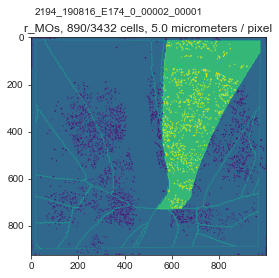

In [50]:
#test visualization on neuron overlay on CCF

print(areas)
selected_area=input("Which area are you interested in:")
for i in range(len(areas)):
    if selected_area==areas[i]:
        area_num=i
        print("You have selected: "+selected_area)

res_int = float(input("What is the resolution, in micrometers per pixel:"))
#res_int = 5 #Resolution, in micrometers per pixel
im_restrict = np.zeros((ops['Lx'], ops['Ly']))

for n in range(0,nROIs):
    if iscell[n,0]==1:
        ypix = stat[n]['ypix'][~stat[n]['overlap']]#*res_int
        xpix = stat[n]['xpix'][~stat[n]['overlap']]#*res_int
        if (iscell[n,0] == 1) & (iscell[n,1] > 0.50) & (iscell_masks[n] == area_num):
            im_restrict[xpix,ypix] = 1
        else:
            im_restrict[xpix,ypix] = -1

#fig, ax = plt.subplots(figsize=(8,8))
#sns.heatmap(im,ax=ax,cmap='RdBu_r',center=0,cbar=False)#,color_continuous_scale='RdBu_r')
#plt.title(fsuffix+","+str(np.count_nonzero(iscell[:,0]))+" cells")
#print(im.shape)

#plt.imsave(os.path.join(PlotDir,'neural-location_real_'+areas[area_num]+'_{}.png'.format(fsuffix)),im)

#ax.axis('off')
#plt.savefig(os.path.join(PlotDir,'neural-location_'+areas[area_num]+'_{}.png'.format(fsuffix)))

#im_restrict_masked=im_restrict+session_masks[area_num,:,:]+outlines[area_num,:,:]
for i in range(len(im_restrict[:,0])):
    for j in range(len(im_restrict[0,:])):
        if outlines_flat[i,j]>0:
            im_restrict[i,j]=1

im_restrict_masked=im_restrict+session_masks[area_num,:,:]

cell_count=np.zeros(62,dtype='int')

for i in range(len(iscell_masks)):
    cell_count[int(iscell_masks[i])]=cell_count[int(iscell_masks[i])]+1

#plt.figure()
#plt.imshow(im_restrict,cmap='viridis')
#plt.title(selected_area+", "+str(cell_count[area_num])+" cells")

plt.figure()
plt.imshow(im_restrict_masked,cmap='viridis')
plt.title(selected_area+", "+str(cell_count[area_num])+"/"+str(np.count_nonzero(iscell[:,0]))+" cells, "+str(res_int)+" micrometers / pixel")
plt.text(15, -100, fsuffix)

In [51]:
#create hierarchical dictionary of CCF areas

regional_ccf_dict = {'FrontalCortex': ['FRP', 'PL', 'ACAd', 'MOs', 'MOp'],
            'VisualCortex' : ['VISp', 'VISpl', 'VISpor', 'VISl', 'VISli', 'VISal', 'VISrl', 'VISa', 'VISam', 'VISpm'],
            'AuditoryCortex':['AUDp', 'AUDv', 'AUDd', 'AUDpo'],
            'SomatosensoryCortex':['SSp', 'SSp-tr', 'SSp-ll', 'SSp-ul', 'SSp-m', 'SSp-n', 'SSp-un', 'SSp-bfd', 'SSs'],
            'PosteriorCortex':['RSPv', 'RSPd', 'RSPagl', 'TEa']
       }

In [52]:
#display CCF hierarchical dictionary

regional_ccf_dict

{'FrontalCortex': ['FRP', 'PL', 'ACAd', 'MOs', 'MOp'],
 'VisualCortex': ['VISp',
  'VISpl',
  'VISpor',
  'VISl',
  'VISli',
  'VISal',
  'VISrl',
  'VISa',
  'VISam',
  'VISpm'],
 'AuditoryCortex': ['AUDp', 'AUDv', 'AUDd', 'AUDpo'],
 'SomatosensoryCortex': ['SSp',
  'SSp-tr',
  'SSp-ll',
  'SSp-ul',
  'SSp-m',
  'SSp-n',
  'SSp-un',
  'SSp-bfd',
  'SSs'],
 'PosteriorCortex': ['RSPv', 'RSPd', 'RSPagl', 'TEa']}

In [53]:
#import modules for creating nwb output

import numpy as np
from pynwb import NWBFile, TimeSeries, NWBHDF5IO
from pynwb.epoch import TimeIntervals
from pynwb.file import Subject
from pynwb.behavior import SpatialSeries, Position
from pynwb.image import RGBAImage, RGBImage, GrayscaleImage
from pynwb.base import Images
from PIL import Image
from datetime import datetime
from dateutil import tz

In [54]:
#format session timestamp information for nwb creation

from datetime import datetime
from dateutil.tz import tzlocal
from pynwb import NWBFile
import numpy as np
import time

if input("Did you export a starttime?").lower()=="yes":
    data_folder=input('Enter path to data folder:')
    #get starttime
    with open(data_folder+"\\"+fsuffix+"_starttime.txt") as f:
        contents = f.read()
        print(contents)
    start_time=contents    

    timestr = time.strftime("%Y%m%d-%H%M%S")
    print(timestr)

    year=int(start_time[7:12])
    month=int(fsuffix[7:9])
    day=int(fsuffix[9:11])
    hour=int(start_time[12:14])
    minute=int(start_time[15:17])
    second=int(start_time[18:20])
else:
    year=2020
    month=3
    day=17
    hour=0
    minute=0
    second=0

start_time = datetime(year, month, day, hour, minute, second, tzinfo=tzlocal())
#create_date = datetime(2017, 4, 15, 12, tzinfo=tzlocal())
create_date = datetime(int(time.strftime("%Y")),int(time.strftime("%m")),int(time.strftime("%d")),int(time.strftime("%H")),tzinfo=tzlocal())

session_desc=input("What type of session is this?")
nwbfile = NWBFile(session_description=session_desc,  # required
                  identifier='fsuffix',  # required
                  session_start_time=start_time,  # required
                  file_create_date=create_date)  # optional

print(nwbfile)

Did you export a starttime? Yes
Enter path to data folder: H:\OLD_Data_2_D_12TB_Mar1521\McCormick_Data_May_2019-Nov_2019\Aug\2194_190816_E174_am_1\2P


16-Aug-2019 10:54:21
20230319-101855


What type of session is this? Spont


root pynwb.file.NWBFile at 0x1620207862672
Fields:
  file_create_date: [datetime.datetime(2023, 3, 19, 10, 0, tzinfo=tzlocal())]
  identifier: fsuffix
  session_description: Spont
  session_start_time: 2019-08-16 10:54:21-07:00
  timestamps_reference_time: 2019-08-16 10:54:21-07:00



In [55]:
#add additional session metadata for nwb file

SUBJECT_ID=str(fsuffix[0:4])
AGE=input("age in days?")
AGE="P"+str(AGE)+"D"
DESCRIPTION=str(fsuffix[12:16])
SEX=str(input("sex? (M/F)"))

nwbfile.subject=Subject(
    subject_id=SUBJECT_ID,
    age=AGE,
    description=DESCRIPTION,
    species="Mus musculus",
    sex=SEX,
)

print(nwbfile.subject)

age in days? 100
sex? (M/F) F


subject pynwb.file.Subject at 0x1620207864072
Fields:
  age: P100D
  description: E174
  sex: F
  species: Mus musculus
  subject_id: 2194



In [56]:
#add neural activity data to nwb

from pynwb import TimeSeries

data = dfof_upsamp_frame.T.to_numpy()

timestamps = dfof_upsamp_frame.index.to_numpy()
dfof_ts = TimeSeries(name='dfof_timeseries', data=data, unit='dfof', timestamps=timestamps)

nwbfile.add_acquisition(dfof_ts)
nwbfile.acquisition['dfof_timeseries']

dfof_timeseries pynwb.base.TimeSeries at 0x1620200393752
Fields:
  comments: no comments
  conversion: 1.0
  data: [[ 9.0103e-03  2.3315e-01  6.6846e-01 ...  6.5918e-01  2.4817e-01
   2.1805e-02]
 [ 3.6523e-01  4.0308e-01  6.4844e-01 ...  9.5020e-01  6.6162e-01
   4.6777e-01]
 [-1.1426e-01  4.4482e-01  9.4238e-01 ... -6.9519e-02 -4.5312e-01
  -4.7144e-01]
 ...
 [ 5.9766e+00  3.8457e+00  1.3936e+00 ...  4.4297e+00  6.1289e+00
   6.8320e+00]
 [ 1.5492e+01  1.3367e+01  9.1406e+00 ...  7.2969e+00  1.1391e+01
   1.4648e+01]
 [ 1.2622e-01  3.1738e-01  5.1514e-01 ...  2.2644e-01  7.3181e-02
   3.0624e-02]]
  description: no description
  interval: 1
  resolution: -1.0
  timestamps: [0.00000000e+00 1.08990602e-04 2.17981204e-04 ... 1.99856067e+00
 1.99866966e+00 1.99877865e+00]
  timestamps_unit: seconds
  unit: dfof

In [57]:
#add bsoid data to nwb

data = bsoid_frame.T.to_numpy()

timestamps = bsoid_frame.index.to_numpy()
bsoid_ts = TimeSeries(name='bsoid_timeseries', data=data, unit='motif#', timestamps=timestamps)

nwbfile.add_acquisition(bsoid_ts)
nwbfile.acquisition['bsoid_timeseries']

bsoid_timeseries pynwb.base.TimeSeries at 0x1620199522200
Fields:
  comments: no comments
  conversion: 1.0
  data: [[ 0.  0.  0. ... 10. 10. 10.]]
  description: no description
  interval: 1
  resolution: -1.0
  timestamps: [0.00000000e+00 2.17981204e-07 4.35962408e-07 ... 1.19852605e-02
 1.19854785e-02 1.19856965e-02]
  timestamps_unit: seconds
  unit: motif#

In [58]:
#add left pupil, etc...

data = behav_resamp_frame['lft_ppl_ser'].T.to_numpy()

timestamps = behav_resamp_frame.index.to_numpy()
lft_ppl_ts = TimeSeries(name='lft_ppl_timeseries', data=data, unit='dia, au', timestamps=timestamps)

nwbfile.add_acquisition(lft_ppl_ts)
nwbfile.acquisition['lft_ppl_timeseries']

lft_ppl_timeseries pynwb.base.TimeSeries at 0x1620200425960
Fields:
  comments: no comments
  conversion: 1.0
  data: [0.35456005 0.35453498 0.35470888 ... 0.29503769 0.29502958 0.29501897]
  description: no description
  interval: 1
  resolution: -1.0
  timestamps: [0.00000000e+00 1.08990602e-04 2.17981204e-04 ... 1.99856067e+00
 1.99866966e+00 1.99877865e+00]
  timestamps_unit: seconds
  unit: dia, au

In [59]:
data = behav_resamp_frame['rt_ppl_ser'].T.to_numpy()

timestamps = behav_resamp_frame.index.to_numpy()
rt_ppl_ts = TimeSeries(name='rt_ppl_timeseries', data=data, unit='dia, au', timestamps=timestamps)

nwbfile.add_acquisition(rt_ppl_ts)
nwbfile.acquisition['rt_ppl_timeseries']

rt_ppl_timeseries pynwb.base.TimeSeries at 0x1620200424336
Fields:
  comments: no comments
  conversion: 1.0
  data: [0.22261021 0.26792389 0.31318304 ... 0.33053899 0.33055112 0.33056864]
  description: no description
  interval: 1
  resolution: -1.0
  timestamps: [0.00000000e+00 1.08990602e-04 2.17981204e-04 ... 1.99856067e+00
 1.99866966e+00 1.99877865e+00]
  timestamps_unit: seconds
  unit: dia, au

In [60]:
data = behav_resamp_frame['lft_whisk_ser'].T.to_numpy()

timestamps = behav_resamp_frame.index.to_numpy()
lft_whisk_ts = TimeSeries(name='lft_whisk_timeseries', data=data, unit='dia, au', timestamps=timestamps)

nwbfile.add_acquisition(lft_whisk_ts)
nwbfile.acquisition['lft_whisk_timeseries']

lft_whisk_timeseries pynwb.base.TimeSeries at 0x1620200423832
Fields:
  comments: no comments
  conversion: 1.0
  data: [0.0871097  0.08135907 0.08477881 ... 0.00904415 0.00905131 0.00902067]
  description: no description
  interval: 1
  resolution: -1.0
  timestamps: [0.00000000e+00 1.08990602e-04 2.17981204e-04 ... 1.99856067e+00
 1.99866966e+00 1.99877865e+00]
  timestamps_unit: seconds
  unit: dia, au

In [61]:
data = behav_resamp_frame['rt_whisk_ser'].T.to_numpy()

timestamps = behav_resamp_frame.index.to_numpy()
rt_whisk_ts = TimeSeries(name='rt_whisk_timeseries', data=data, unit='dia, au', timestamps=timestamps)

nwbfile.add_acquisition(rt_whisk_ts)
nwbfile.acquisition['rt_whisk_timeseries']

rt_whisk_timeseries pynwb.base.TimeSeries at 0x1620200833600
Fields:
  comments: no comments
  conversion: 1.0
  data: [0.06362198 0.22152209 0.19010393 ... 0.01052186 0.01051957 0.01050555]
  description: no description
  interval: 1
  resolution: -1.0
  timestamps: [0.00000000e+00 1.08990602e-04 2.17981204e-04 ... 1.99856067e+00
 1.99866966e+00 1.99877865e+00]
  timestamps_unit: seconds
  unit: dia, au

In [62]:
data = behav_resamp_frame['walk_ser'].T.to_numpy()

timestamps = behav_resamp_frame.index.to_numpy()
walk_ts = TimeSeries(name='walk_timeseries', data=data, unit='dia, au', timestamps=timestamps)

nwbfile.add_acquisition(walk_ts)
nwbfile.acquisition['walk_timeseries']

walk_timeseries pynwb.base.TimeSeries at 0x1620207864128
Fields:
  comments: no comments
  conversion: 1.0
  data: [2.99956489 2.99946213 2.99952078 ... 2.99932027 2.99933887 2.99942636]
  description: no description
  interval: 1
  resolution: -1.0
  timestamps: [0.00000000e+00 1.08990602e-04 2.17981204e-04 ... 1.99856067e+00
 1.99866966e+00 1.99877865e+00]
  timestamps_unit: seconds
  unit: dia, au

In [63]:
#import additional nwb relevant modules

from datetime import datetime
from dateutil.tz import tzlocal

import numpy as np
from pynwb import NWBFile, TimeSeries, NWBHDF5IO
from pynwb.image import ImageSeries
from pynwb.ophys import TwoPhotonSeries, OpticalChannel, ImageSegmentation, \
    Fluorescence, CorrectedImageStack, MotionCorrection, RoiResponseSeries

import matplotlib.pyplot as plt

In [64]:
#add roi info frames to nwb, etc...

for i in range(len(roi_info_frame.columns)):
    var=str(roi_info_frame.columns[i])
    print(var)
    data = roi_info_frame[roi_info_frame.columns[i]].T.to_numpy()
    timestamps = roi_info_frame.index.to_numpy()
    var = TimeSeries(name=var, data=data, unit='iscell_num', timestamps=timestamps)
    nwbfile.add_acquisition(var)
    nwbfile.acquisition[roi_info_frame.columns[i]]

nwbfile.acquisition[roi_info_frame.columns[i]]

isort_dfof
isort_rastergroup
iscell_masks_cell
iscell_loc
med_x
med_y
npix
radius
aspect_ratio
compact
footprint
skew
std


std pynwb.base.TimeSeries at 0x1620200393864
Fields:
  comments: no comments
  conversion: 1.0
  data: [298.2  180.9  357.8  ...  39.03  58.4   53.3 ]
  description: no description
  interval: 1
  resolution: -1.0
  timestamps: [   0    1    2 ... 3429 3430 3431]
  timestamps_unit: seconds
  unit: iscell_num

In [65]:
for i in range(len(behav_corr_frame.columns)):
    var=str(behav_corr_frame.columns[i])
    print(var)
    data = behav_corr_frame[behav_corr_frame.columns[i]].T.to_numpy()
    timestamps = behav_corr_frame.index.to_numpy()
    var = TimeSeries(name=var, data=data, unit='iscell_num', timestamps=timestamps)
    nwbfile.add_acquisition(var)
    nwbfile.acquisition[behav_corr_frame.columns[i]]

nwbfile.acquisition[roi_info_frame.columns[i]]

lft_whisk_corr
rt_whisk_corr
lft_ppl_corr
rt_ppl_corr
walk_corr


med_x pynwb.base.TimeSeries at 0x1620207795616
Fields:
  comments: no comments
  conversion: 1.0
  data: [720.  240.  426.  ... 681.5 353.  242. ]
  description: no description
  interval: 1
  resolution: -1.0
  timestamps: [   0    1    2 ... 3429 3430 3431]
  timestamps_unit: seconds
  unit: iscell_num

In [66]:
#save ops to NWB

#Session header info
#ops
#ops_keys = list(ops)
#for i in range(len(getList(ops))):
#    print(ops_keys[i])
    
#print(ops['tau'])
#print(len(ops_keys))
#print(len(ops))

for i in range(len(ops)-1):
    var=str(ops_keys[i])
    #print(var)
    data_pre = ops[ops_keys[i]]
    #print(data_pre)
    data=np.array(data_pre)
    foo=0
    if not data.shape:
        foo=1
        data_dbl=np.array([data,data])
    #print(data)
    #timestamps = np.array(ops_keys[i])
    if foo==0:
        var = TimeSeries(name=var, data=data, unit='suite2p_ops',rate=1.0)
    else:
        var = TimeSeries(name=var, data=data_dbl, unit='suite2p_ops',rate=1.0)
    nwbfile.add_acquisition(var)
    
nwbfile.acquisition[ops_keys[1]]

fast_disk pynwb.base.TimeSeries at 0x1619575484488
Fields:
  comments: no comments
  conversion: 1.0
  data: ['/data/evicker2/suite2p_fast_disk/suite2p/plane0'
 '/data/evicker2/suite2p_fast_disk/suite2p/plane0']
  description: no description
  rate: 1.0
  resolution: -1.0
  starting_time: 0.0
  starting_time_unit: seconds
  unit: suite2p_ops

In [67]:
#save area names and regional area dictionary to NWB

data = regional_ccf_dict['FrontalCortex']

#timestamps = regional_ccf_dict['FrontalCortex']
FrontalCortex = TimeSeries(name='FrontalCortex_dict', data=data, unit='ccf_foods', rate=1.0)

nwbfile.add_acquisition(FrontalCortex)
nwbfile.acquisition['FrontalCortex_dict']

FrontalCortex_dict pynwb.base.TimeSeries at 0x1620199274312
Fields:
  comments: no comments
  conversion: 1.0
  data: ['FRP' 'PL' 'ACAd' 'MOs' 'MOp']
  description: no description
  rate: 1.0
  resolution: -1.0
  starting_time: 0.0
  starting_time_unit: seconds
  unit: ccf_foods

In [68]:
#save area names and regional area dictionary to NWB

data = regional_ccf_dict['VisualCortex']

#timestamps = regional_ccf_dict['VisualCortex']
VisualCortex = TimeSeries(name='VisualCortex_dict', data=data, unit='ccf_foods', rate=1.0)

nwbfile.add_acquisition(VisualCortex)
nwbfile.acquisition['VisualCortex_dict']

VisualCortex_dict pynwb.base.TimeSeries at 0x1620200822544
Fields:
  comments: no comments
  conversion: 1.0
  data: ['VISp' 'VISpl' 'VISpor' 'VISl' 'VISli' 'VISal' 'VISrl' 'VISa' 'VISam'
 'VISpm']
  description: no description
  rate: 1.0
  resolution: -1.0
  starting_time: 0.0
  starting_time_unit: seconds
  unit: ccf_foods

In [69]:
#save area names and regional area dictionary to NWB

data = regional_ccf_dict['AuditoryCortex']

#timestamps = regional_ccf_dict['AuditoryCortex']
AuditoryCortex = TimeSeries(name='AuditoryCortex_dict', data=data, unit='ccf_foods', rate=1.0)

nwbfile.add_acquisition(AuditoryCortex)
nwbfile.acquisition['AuditoryCortex_dict']

AuditoryCortex_dict pynwb.base.TimeSeries at 0x1620200821200
Fields:
  comments: no comments
  conversion: 1.0
  data: ['AUDp' 'AUDv' 'AUDd' 'AUDpo']
  description: no description
  rate: 1.0
  resolution: -1.0
  starting_time: 0.0
  starting_time_unit: seconds
  unit: ccf_foods

In [70]:
#save area names and regional area dictionary to NWB

data = regional_ccf_dict['SomatosensoryCortex']

#timestamps = regional_ccf_dict['SomatosensoryCortex']
SomatosensoryCortex = TimeSeries(name='SomatosensoryCortex_dict', data=data, unit='ccf_foods', rate=1.0)

nwbfile.add_acquisition(SomatosensoryCortex)
nwbfile.acquisition['SomatosensoryCortex_dict']

SomatosensoryCortex_dict pynwb.base.TimeSeries at 0x1620200822488
Fields:
  comments: no comments
  conversion: 1.0
  data: ['SSp' 'SSp-tr' 'SSp-ll' 'SSp-ul' 'SSp-m' 'SSp-n' 'SSp-un' 'SSp-bfd' 'SSs']
  description: no description
  rate: 1.0
  resolution: -1.0
  starting_time: 0.0
  starting_time_unit: seconds
  unit: ccf_foods

In [71]:
#saveregional area dictionary to NWB

data = regional_ccf_dict['PosteriorCortex']

#timestamps = regional_ccf_dict['PosteriorCortex']
PosteriorCortex = TimeSeries(name='PosteriorCortex_dict', data=data, unit='ccf_foods', rate=1.0)

nwbfile.add_acquisition(PosteriorCortex)
nwbfile.acquisition['PosteriorCortex_dict']

PosteriorCortex_dict pynwb.base.TimeSeries at 0x1620200823944
Fields:
  comments: no comments
  conversion: 1.0
  data: ['RSPv' 'RSPd' 'RSPagl' 'TEa']
  description: no description
  rate: 1.0
  resolution: -1.0
  starting_time: 0.0
  starting_time_unit: seconds
  unit: ccf_foods

In [72]:
#save area names and regional area dictionary to NWB

areas

data = areas

#timestamps = regional_ccf_dict['PosteriorCortex']
areas = TimeSeries(name='areas', data=data, unit='ccf_foods', rate=1.0)

nwbfile.add_acquisition(areas)
nwbfile.acquisition['areas']

areas pynwb.base.TimeSeries at 0x1620206297216
Fields:
  comments: no comments
  conversion: 1.0
  data: ['l_VISp' 'l_VISpl' 'l_VISpor' 'l_VISl' 'l_VISli' 'l_VISal' 'l_VISrl'
 'l_VISa' 'l_VISam' 'l_VISpm' 'l_FRP' 'l_PL' 'l_ACAd' 'l_MOs' 'l_MOp'
 'l_RSPv' 'l_RSPd' 'l_RSPagl' 'l_SSp-tr' 'l_SSp-ll' 'l_SSp-ul' 'l_SSp-m'
 'l_SSp-n' 'l_SSp-un' 'l_SSp-bfd' 'l_SSs' 'l_AUDp' 'l_AUDv' 'l_AUDd'
 'l_AUDpo' 'l_TEa' 'r_VISp' 'r_VISpl' 'r_VISpor' 'r_VISl' 'r_VISli'
 'r_VISal' 'r_VISrl' 'r_VISa' 'r_VISam' 'r_VISpm' 'r_FRP' 'r_PL' 'r_ACAd'
 'r_MOs' 'r_MOp' 'r_RSPv' 'r_RSPd' 'r_RSPagl' 'r_SSp-tr' 'r_SSp-ll'
 'r_SSp-ul' 'r_SSp-m' 'r_SSp-n' 'r_SSp-un' 'r_SSp-bfd' 'r_SSs' 'r_AUDp'
 'r_AUDv' 'r_AUDd' 'r_AUDpo' 'r_TEa']
  description: no description
  rate: 1.0
  resolution: -1.0
  starting_time: 0.0
  starting_time_unit: seconds
  unit: ccf_foods

In [73]:
#reset save directory if necessary

print(PlotDir)
print(fsuffix)
PlotDir = os.path.join('G:\\uobrainflex_analysis_2022',fsuffix)
#PlotDir='I:\uobrainflex_analysis_2022\meso_sci_ppr_I_2022\plots\3056_200924_E235_1_00003_00001'
print(PlotDir)

G:\uobrainflex_analysis_2022\2194_190816_E174_0_00002_00001
2194_190816_E174_0_00002_00001
G:\uobrainflex_analysis_2022\2194_190816_E174_0_00002_00001


In [75]:
#write nwb output file

from pynwb import NWBHDF5IO
import time

timestr = time.strftime("%Y%m%d-%H%M%S")

try:
    print(PlotDir)
except:
    PlotDir=str(input("Enter PlotDir:"))

nwb_filepath_filename=PlotDir+'\\nwbfile_'+fsuffix+'_'+timestr+'.nwb'

io = NWBHDF5IO(nwb_filepath_filename, mode='w')
io.write(nwbfile)
io.close()

G:\uobrainflex_analysis_2022\2194_190816_E174_0_00002_00001


In [76]:
#close nwb file

io.close()